In [1]:
import pandas as pd

y_test = pd.read_csv('gender_submission.csv')
X_test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')


In [2]:
y_test = y_test.drop('PassengerId',axis = 1)
y_test.head()

,Survived
0,0
1,1
2,0
3,0
4,1


In [3]:
y_test.shape

(418, 1)

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.shape

(891, 12)

In [6]:
X_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
X_test.shape

(418, 11)

In [8]:
#Drop all the columns wich as no influence on the fact that the person survive or not

X_test = X_test.drop("Cabin", axis = 1)
X_test = X_test.drop("Name", axis = 1)
X_test = X_test.drop("Ticket", axis = 1)

train = train.drop("Cabin", axis = 1)
train = train.drop("Name", axis = 1)
train = train.drop("Ticket", axis = 1)


In [9]:
X_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [10]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [11]:
#Drop another column wich as no influence on the fact that the person survive or not

X_test = X_test.drop("PassengerId", axis = 1)
train = train.drop("PassengerId", axis = 1)

In [12]:
def colonnes_avec_nan(df):
    colonnes_avec_nan = df.columns[df.isna().any()].tolist()
    return colonnes_avec_nan

# Appel de la fonction
colonnes_nan = colonnes_avec_nan(train)

# Affichage des résultats
print("Colunms with NaN values :", colonnes_nan)

Colunms with NaN values : ['Age', 'Embarked']


In [13]:
#Drop all the NAN values of embarked in the train dataframe in order to not have any error
#there is not NAN values of embarked in the test dataframes

train = train.dropna(subset=['Embarked'])
train = train.dropna(subset=['Age'])
train.shape

(712, 8)

In [14]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [15]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [16]:
#Drop all the NAN values of Age in the test dataframes (x_test and y_tes) in order to not have any error

for i in range(0,418):
    if pd.isnull(X_test['Age'][i]):
        y_test = y_test.drop(i)
        


X_test = X_test.dropna(subset=['Age'])
X_test.shape

(332, 7)

In [17]:
y_test.shape

(332, 1)

In [18]:
#Split the dataframe train in X_train and then in the next cell in y_train

X_train = train.drop('Survived',axis = 1)
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [19]:
#The y_train from the dataframe train

y_train = train['Survived']
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [20]:
X_train.shape

(712, 7)

In [21]:
X_train.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [22]:
#Change strings in X_train and X_test in int (0,1 or 2) because strings can't be used

#male = 0, female = 1
#S = 0, C = 1, Q = 2

X_train['Sex'] = X_train['Sex'].map({'male': 0, 'female': 1})
X_train['Embarked'] = X_train['Embarked'].map({'S': 0, 'C': 1,'Q' : 2})

X_test['Sex'] = X_test['Sex'].map({'male': 0, 'female': 1})
X_test['Embarked'] = X_test['Embarked'].map({'S': 0, 'C': 1,'Q' : 2})

In [23]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0


In [24]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0


In [25]:
#Try to see if there still NAN values remaining in the dataframe

def NAN_values(df):
    if df.isnull().any().any():
        print("\nThere is NAN values in the DataFrame.")
        
        print("\nColumns with NAN values :\n", df.columns[df.isnull().any()])

        print("\nLine with NAN values :\n", df[df.isnull().any(axis=1)])
        
    else:
        print("\nThere is not NAN values in this DataFrame.")

In [26]:
NAN_values(X_test)


There is NAN values in the DataFrame.

Columns with NAN values :
 Index(['Fare'], dtype='object')

Line with NAN values :
      Pclass  Sex   Age  SibSp  Parch  Fare  Embarked
152       3    0  60.5      0      0   NaN         0


In [27]:
NAN_values(X_train)


There is not NAN values in this DataFrame.


In [28]:
#Drop the last NAN value of the dataframe

X_test = X_test.dropna(subset=['Fare'])
y_test = y_test.drop(152)

In [29]:
X_test.shape

(331, 7)

In [30]:
y_test.shape

(331, 1)

In [31]:
#The function for the trainning of the model

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f'\nAccuracy : {accuracy * 100:.2f}%')
    
    print('\nClassification report :')
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel('Predictions')
    plt.ylabel('Real values')
    plt.title('Confusion matrix')
    plt.show()

C:\Users\guill\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Accuracy : 91.84%

Classification report :
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       204
           1       0.88      0.91      0.90       127

    accuracy                           0.92       331
   macro avg       0.91      0.92      0.91       331
weighted avg       0.92      0.92      0.92       331



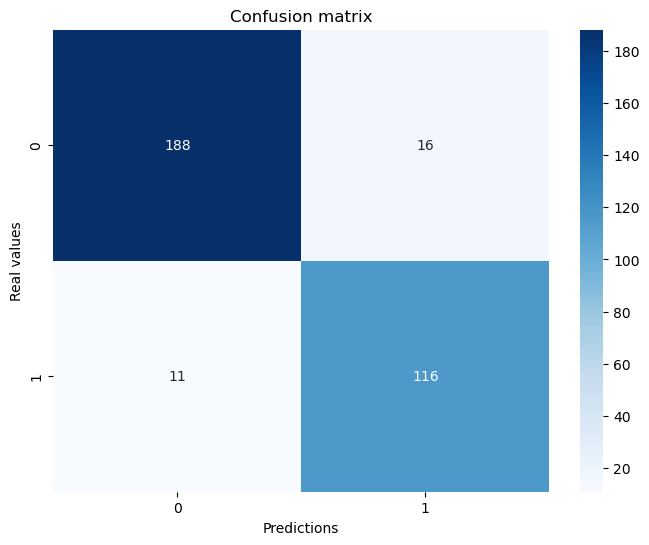

In [32]:
#The model with his trainning and the importants information (accurancy, Classification report, Confusion matrix)

from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
train_and_evaluate_model(logistic_model, X_train, y_train, X_test, y_test)


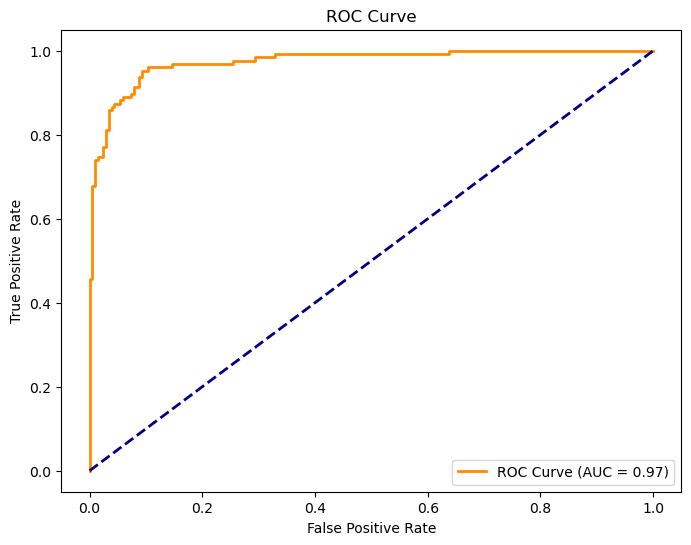

In [33]:
from sklearn.metrics import roc_curve, auc

# Predicted probabilities
y_prob = logistic_model.predict_proba(X_test)[:, 1]

# Calculate false positive rates (fpr) and true positive rates (tpr)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()



C:\Users\guill\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\guill\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\guill\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\guill\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

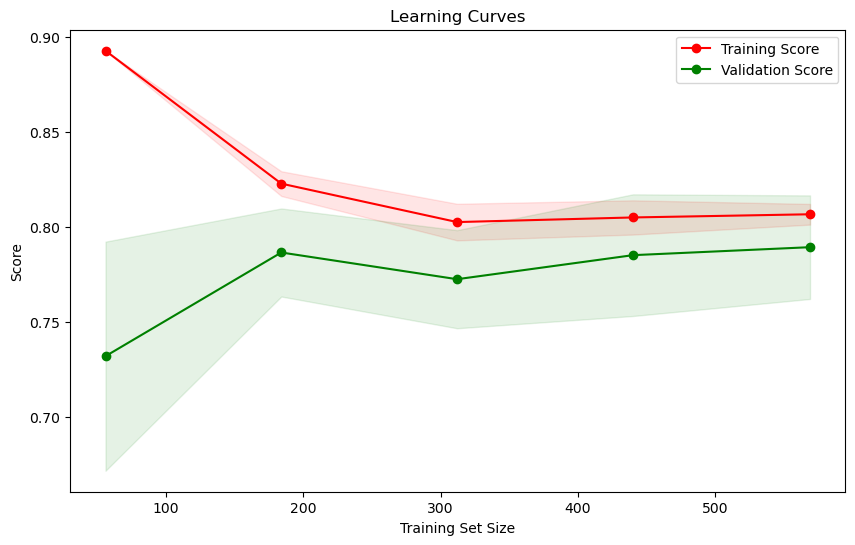

In [34]:
import numpy as np
from sklearn.model_selection import learning_curve

# Calculate training and validation scores
train_sizes, train_scores, test_scores = learning_curve(logistic_model, X_train, y_train, cv=5)

# Calculate means and standard deviations
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validation Score")
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend(loc="best")
plt.show()


In [35]:
#Function to try if someone as chance to survive or not according to parameters asked to the user

def is_alive():
    tab_test = []

    Pclass = int(input("Pclass : "))
    tab_test.append(Pclass)
    Sex = int(input("Sex (male : 0, female : 1 ) : "))
    tab_test.append(Sex)
    Age = float(input("Age : "))
    tab_test.append(Age)
    SibSp = int(input("SibSp : "))
    tab_test.append(SibSp)
    Parch = int(input("Parch : "))
    tab_test.append(Parch)
    Fare= float(input("Fare : "))
    tab_test.append(Fare)
    Embarked= int(input("Embarked (S : 0, C : 1, Q : 2) : "))
    tab_test.append(Embarked)

    tab_test2 = []
    tab_test2.append(tab_test)

    data_test = pd.DataFrame(tab_test2) #crée une dataframe à partir d'un tableau

    pred = logistic_model.predict(data_test)
    if pred == 0:
        print("\nThis person will die")
    else:
        print("\nThis person will survive")

In [36]:
is_alive()

Pclass : 1
Sex (male : 0, female : 1 ) : 1
Age : 1
SibSp : 1
Parch : 1
Fare : 1
Embarked (S : 0, C : 1, Q : 2) : 1

This person will survive


C:\Users\guill\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
